In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
import seaborn

In [4]:
df = pd.read_csv("../data/PreProcessed/MixWine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


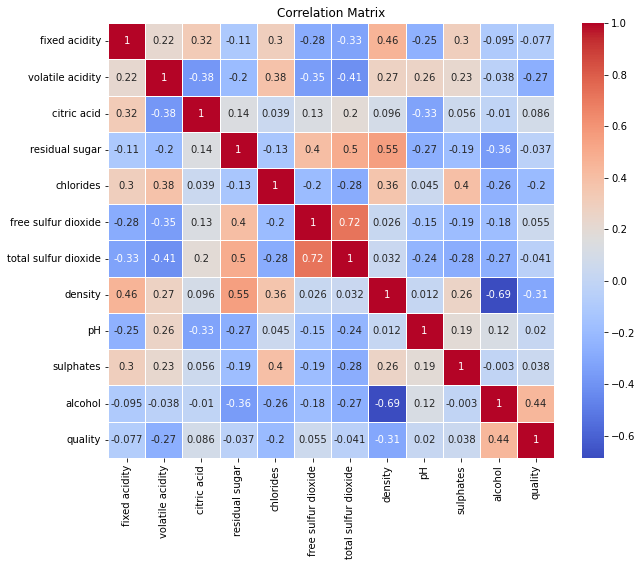

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Figure size 576x576 with 0 Axes>

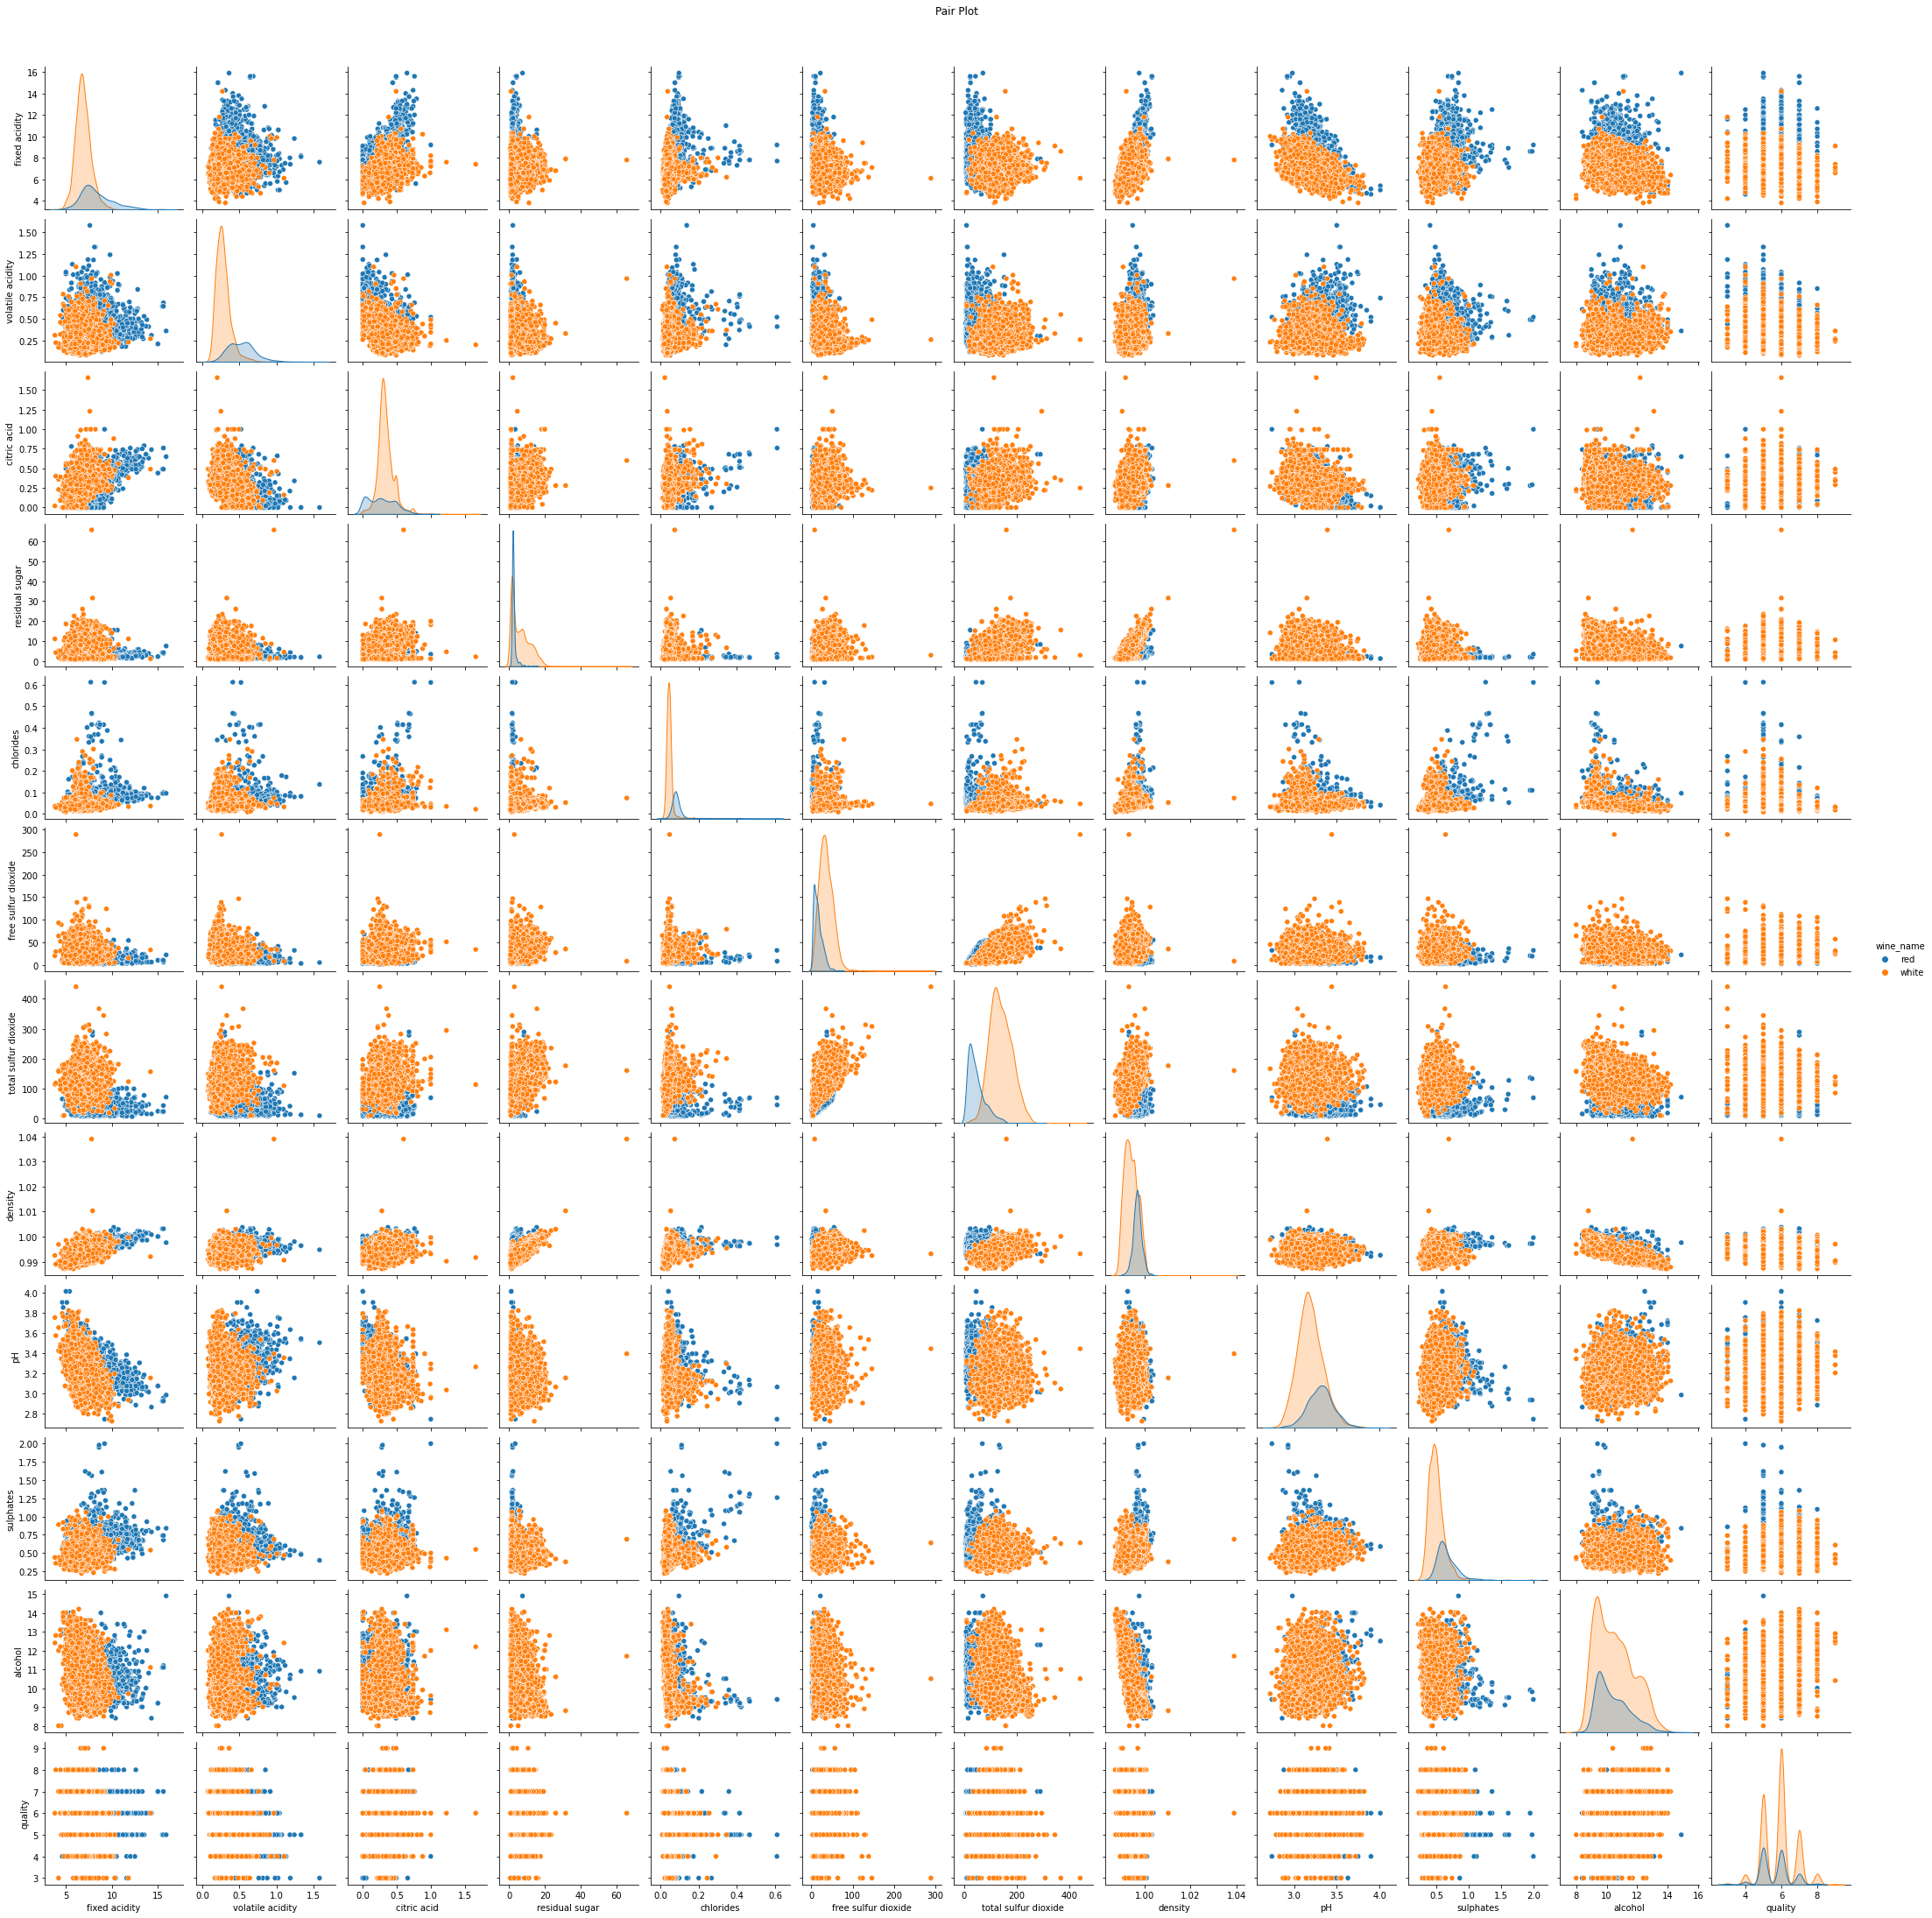

In [7]:
#plt.figure(figsize=(8,8))
#sns.pairplot(df, kind='scatter', hue='wine_name')
#plt.suptitle('Pair Plot', y=1.02)
#plt.show()

<Figure size 720x576 with 0 Axes>

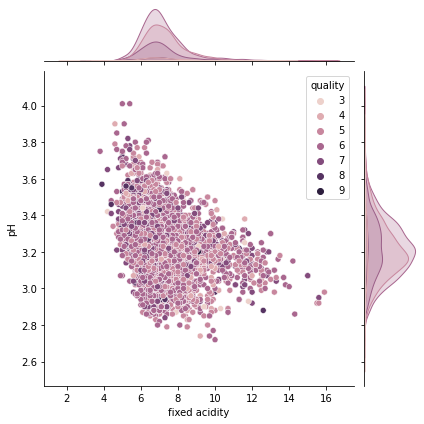

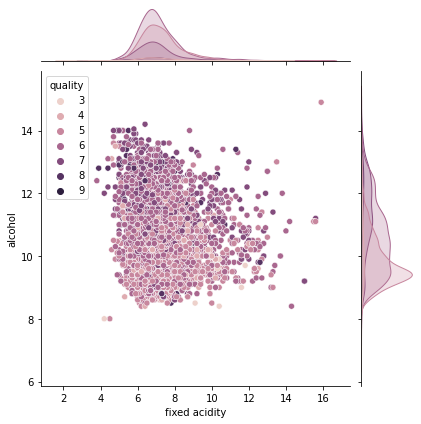

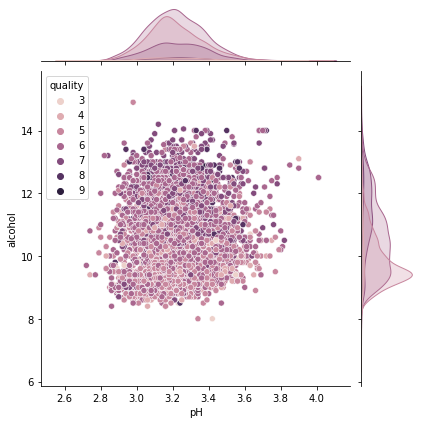

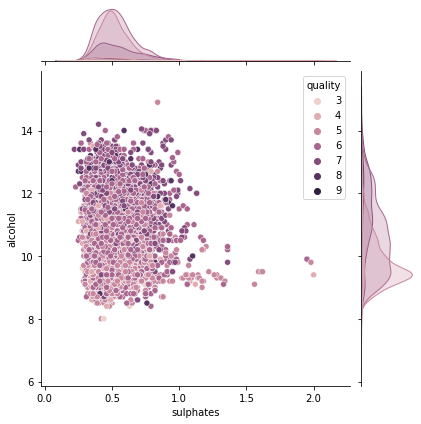

In [45]:
plt.figure(figsize=(10,8))
sns.jointplot(x='fixed acidity',y="pH", data = df, hue = 'quality')
sns.jointplot(x='fixed acidity',y="alcohol", data = df, hue = 'quality') #best ?
sns.jointplot(x='pH',y="alcohol", data = df, hue = 'quality')
sns.jointplot(x='sulphates',y="alcohol", data = df, hue = 'quality')
plt.show()

### EM algo 

In [89]:
from math import exp, log, sqrt, pi 
from numpy.linalg import inv
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [148]:
df_em = df[['fixed acidity', 'alcohol', 'pH']]
n_cluster = 7 #number of clusters 
gmm = GaussianMixture(n_components=n_cluster, tol = 1e-5, max_iter = 200, init_params='kmeans').fit(df_em)
labels = gmm.predict(df_em)
labels+=3 #to have the clusters labels with the same number than quality
print(gmm.means_)

[[ 6.7604601   9.188122    3.11795829]
 [ 7.5853062   9.52045781  3.22670107]
 [ 6.95627152 12.29986352  3.16744782]
 [ 6.87096207 10.50704878  3.27471742]
 [ 9.74872202 11.04236091  3.2394955 ]
 [ 6.05743063 11.12995008  3.31101834]
 [ 8.33943207 10.59554158  3.17142001]]


In [149]:
counts_quality = df['quality'].value_counts().sort_index()
counts_quality

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [150]:
counts_labels = np.bincount(labels)
counts_labels

array([   0,    0,    0, 1305,  967, 1020, 2060,  415,  426,  304])

In [151]:
count_6 = np.count_nonzero(labels == 6)
count_6

2060

In [152]:
np.min(labels)

3

In [157]:
df_pts['pH'].max()

3.54

/var/folders/h8/y3zthszx42qdg84twgyzjdlr0000gn/T/ipykernel_20026/480118553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_em['labels'] = labels


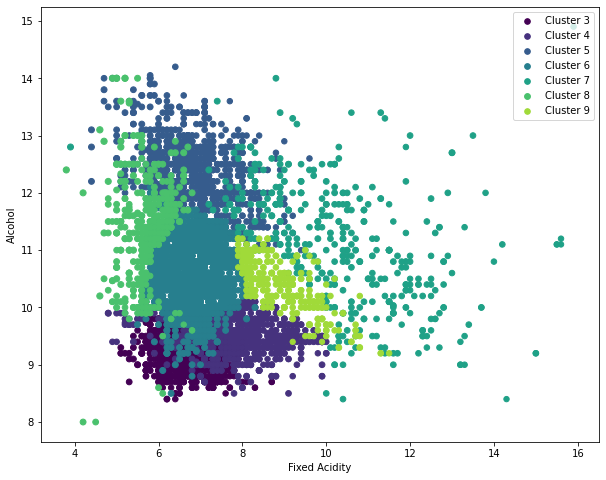

In [163]:
df_em['labels'] = labels
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('viridis')
colors = [cmap(i / n_cluster) for i in range(n_cluster)]

for label, color in zip(np.unique(labels), colors):
    df_pts = df_em[df_em['labels'] == label]
    plt.scatter(df_pts['fixed acidity'], df_pts['alcohol'], label=f'Cluster {label}', color=color, s=df_pts['pH'] *10)

# Ajoutez des étiquettes et une légende au graphique.
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.legend()

# Affichez le graphique.
plt.show()

In [167]:
cluster_3 = df[df_em['labels'] == 3]
cluster_4 = df[df_em['labels'] == 4]
cluster_5 = df[df_em['labels'] == 5]
cluster_6 = df[df_em['labels'] == 6]
cluster_7 = df[df_em['labels'] == 7]
cluster_8 = df[df_em['labels'] == 8]
cluster_9 = df[df_em['labels'] == 9]

In [177]:
#print(cluster_3['quality'].value_counts().sort_index())
for c in range(3, 9):
    cluster_data = df[df_em['labels'] == c]
    value_counts = cluster_data['quality'].value_counts().sort_index()
    print(f"Cluster {c}:")
    print(value_counts)
    print("\n")


Cluster 3:
3      2
4     42
5    709
6    460
7     77
8     15
Name: quality, dtype: int64


Cluster 4:
3      3
4     37
5    528
6    352
7     40
8      7
Name: quality, dtype: int64


Cluster 5:
3      3
4     16
5     69
6    455
7    379
8     94
9      4
Name: quality, dtype: int64


Cluster 6:
3      13
4      74
5     561
6    1028
7     342
8      42
Name: quality, dtype: int64


Cluster 7:
3      3
4      7
5     79
6    197
7    118
8     11
Name: quality, dtype: int64


Cluster 8:
3      2
4     14
5     79
6    212
7     97
8     22
Name: quality, dtype: int64




In [196]:
cluster_.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,6.914412,0.312279,0.331647,4.050441,0.036890,29.268137,110.325490,0.991026,3.169902,0.478608,12.365507,6.459804
std,0.860152,0.109206,0.112682,3.271544,0.016143,13.057656,36.248596,0.001698,0.127661,0.139156,0.568707,0.849494
min,4.400000,0.080000,0.000000,0.700000,0.009000,3.000000,7.000000,0.987110,2.800000,0.220000,11.000000,3.000000
25%,6.400000,0.240000,0.280000,1.700000,0.030000,20.000000,90.000000,0.989800,3.080000,0.380000,12.000000,6.000000
50%,6.800000,0.300000,0.320000,2.800000,0.034000,29.000000,110.000000,0.990760,3.170000,0.440000,12.400000,6.000000
75%,7.500000,0.360000,0.370000,5.250000,0.040000,37.000000,131.000000,0.991900,3.260000,0.550000,12.700000,7.000000
max,10.000000,1.100000,1.660000,22.600000,0.230000,124.000000,294.000000,0.998000,3.530000,1.080000,14.200000,9.000000
